In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot
from pmdarima import auto_arima
import statsmodels.api as sa
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
passengers = pd.read_csv('AirPassengers.csv')
passengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
passengers.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
passengers.Month = pd.to_datetime(passengers.Month, format='%Y-%m-')
passengers.set_index('Month', inplace=True)
passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


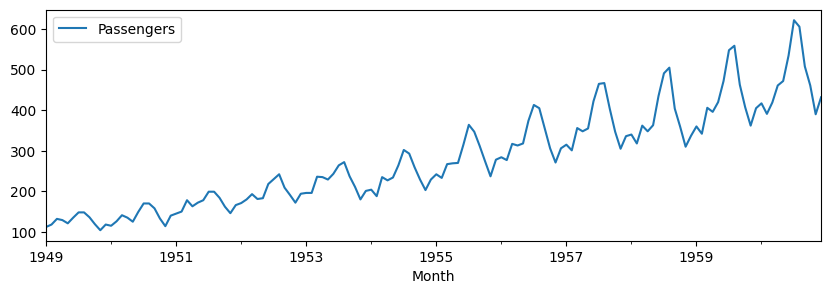

In [4]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
passengers.plot()
pyplot.show()

In [5]:
acf_value = acf(passengers.Passengers)
pacf_value = pacf(passengers.Passengers, nlags=3)
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [6]:
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955])

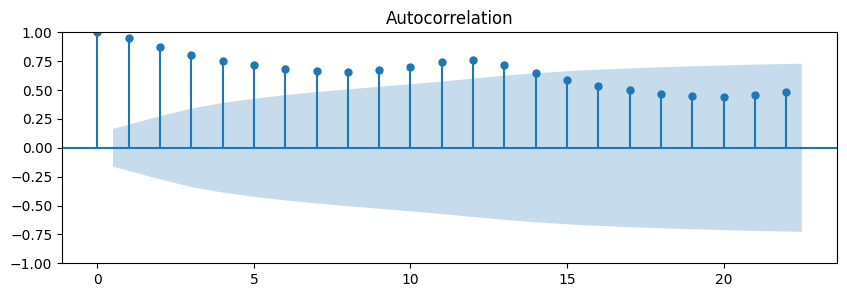

In [7]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
plot_acf(passengers.Passengers)
pyplot.show()

In [8]:
src_data_model = passengers.Passengers['1950':'1955']

In [9]:
model = auto_arima(src_data_model, seasonal=True, m=12, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=459.063, Time=4.60 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=496.385, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=453.883, Time=0.92 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=470.597, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=589.541, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=456.015, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=455.559, Time=1.66 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=455.691, Time=1.22 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=453.728, Time=0.70 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=455.670, Time=0.90 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=457.659, Time=1.63 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=491.454, Time=0.42 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=454.808, Time=0.58 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=455.080, Time=0.56 sec
 ARIMA(2,0,1)(0,1,1)[12] intercep

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [10]:
model_arima = sa.tsa.ARIMA(src_data_model, order=(1, 0, 0)).fit()

In [11]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   72
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -326.661
Date:                Tue, 16 May 2023   AIC                            659.321
Time:                        15:51:39   BIC                            666.151
Sample:                    01-01-1950   HQIC                           662.040
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        205.8199     27.436      7.502      0.000     152.046     259.594
ar.L1          0.9269      0.046     20.128      0.000       0.837       1.017
sigma2       497.1616    105.339      4.720      0.000     290.702     703.621
===================================================================================
Ljung-Box (L1) (Q):                   3.03   Jarque-Bera (JB):                 2.28
Prob(Q):                              0.08   Prob(JB):                         0.32
Heteroskedasticity (H):               2.87   Skew:                             0.34
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
pred_arima = model_arima.predict(start= '1955', end = '1961')

<AxesSubplot:xlabel='Month'>

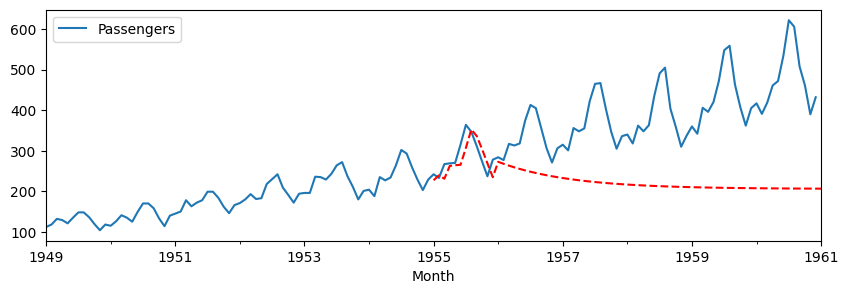

In [13]:
passengers.plot()
pred_arima.plot(style='r--')

In [14]:
model_sarimax = sa.tsa.statespace.SARIMAX(src_data_model, order=(1, 0, 0), seasonal_order=(0, 1, 1, 12)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17229D+00    |proj g|=  3.30772D-02

At iterate    5    f=  3.16971D+00    |proj g|=  2.05911D-02

At iterate   10    f=  3.16887D+00    |proj g|=  4.72822D-03



 This problem is unconstrained.


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   2.650D-06   3.169D+00
  F =   3.1688312631391349     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [15]:
pred_sarimax = model_sarimax.predict('1955','1961', typ='levels')

In [16]:
model_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                   72
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -228.156
Date:                              Tue, 16 May 2023   AIC                            462.312
Time:                                      15:52:14   BIC                            468.595
Sample:                                  01-01-1950   HQIC                           464.769
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9698      0.039     25.112      0.000       0.894       1.045
ma.S.L12      -0.2555      0.144     -1.769      0.077      -0.538       0.028
sigma2       111.5707     24.101      4.629      0.000      64.333     158.808
===================================================================================
Ljung-Box (L1) (Q):                   3.89   Jarque-Bera (JB):                 1.65
Prob(Q):                              0.05   Prob(JB):                         0.44
Heteroskedasticity (H):               1.24   Skew:                             0.32
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

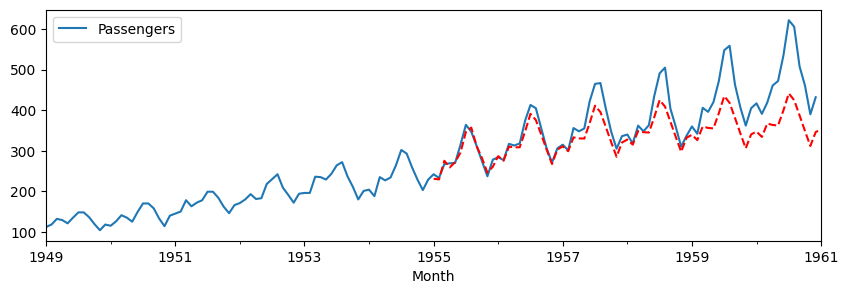

In [17]:
passengers.plot()
pred_sarimax.plot(style='r--')